## **0. Download the dataset**
**Caution**: If you cannot use "gdown", just upload it manually to your google drive and use this command to insert file to google colab:

```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [1]:
# Tsukuba: https://drive.google.com/file/d/14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ/view?usp=sharing
!gdown --id 14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
!unzip tsukuba.zip -d tsukuba

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
To: /content/tsukuba.zip
100% 354k/354k [00:00<00:00, 75.5MB/s]
Archive:  tsukuba.zip
mapname:  conversion of  failed
 extracting: tsukuba/left.png        
 extracting: tsukuba/right.png       
 extracting: tsukuba/groundtruth.png  


## **1. Setting the algorithm**

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

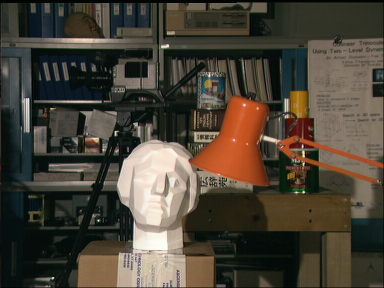

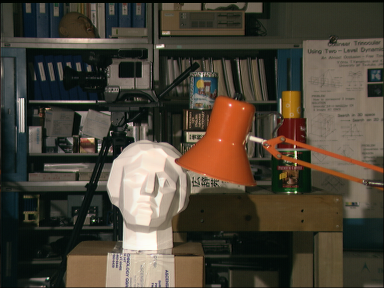

In [4]:
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

In [5]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                                else l1_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


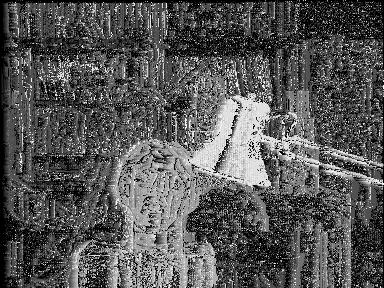

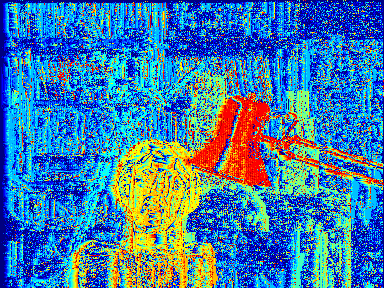

In [6]:
# L1 result
depth, color = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)
cv2_imshow(depth)
cv2_imshow(color)

In [7]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

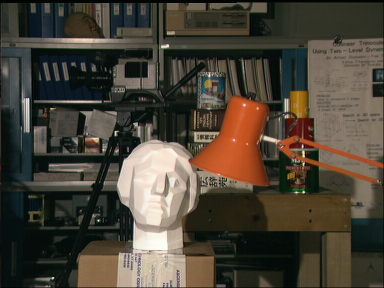

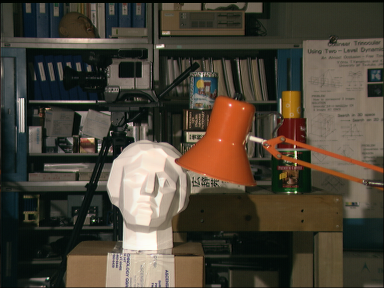

In [10]:
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

Saving result...
Done.


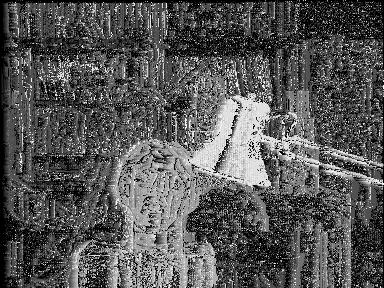

In [16]:
# L1 result
depth, other_value = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

cv2_imshow(depth)

Saving result...
Done.


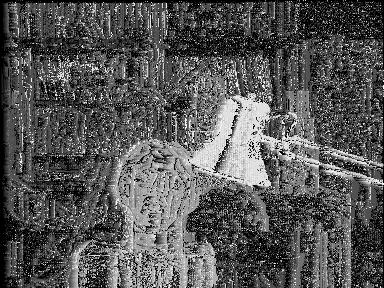

In [17]:
# L2 result
depth = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)
cv2_imshow(depth)